## CREDIT CARD FRAUD DETECTION MODEL 

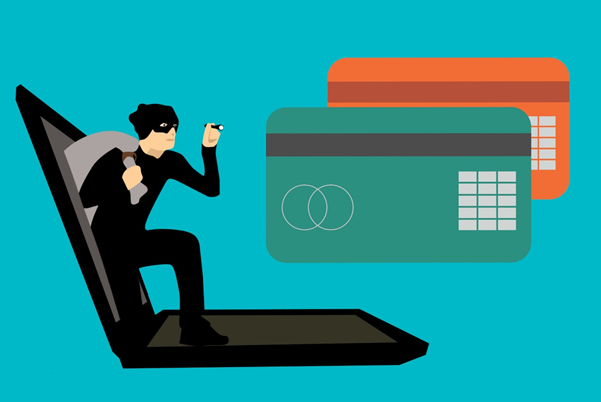

### 1. Introduction
It is important that credit card companies are able to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

#### Content
This data file includes information about the time of transaction, different features of transaction, amount of transaction and if the transaction is legit or not.

#### Process for this model building
1. Importing necessary libraries and dataset
2. Getting familiar with the dataset
3. Cleaning the dataset
4. Processing the dataset
5. Splitting the data into Train and Test data
6. Training the model using Train data
7. Checking the accuracy score of the model

#### Information of data
The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
1. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. 
2. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. 
3. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Is Data ROCCC ?

A good data source is ROCCC which stands for Reliable, Original, Comprehensive, Current, and Cited.

1. Reliable - LOW - Not reliable as it only has data of 2 Days
2. Original - MED - Collected and analysed during a research collaboration of Worldline and the Machine Learning Group
3. Comprehensive - LOW - Parameters are hidden to protect the credit card information
4. Current - LOW - Data is not known how old this data is and may be not relevant
5. Cited - MED - Data collected from Worldline and the Machine Learning Group

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the Dataset

In [2]:
df = pd.read_csv("/Users/aakashdeorukhkar/Desktop/Python/DataSets/creditcard.csv")

#### First 5 rows of the dataset

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

### Columns Information:

1. Time: Time of the transaction (Counted in seconds)
2. Amount: Amount of transaction (in US Dollars)
3. V1-V28 : Features of a particular transaction
4. Class: Informs about whether the transaction in legit or not (0: Legit , 1: Fraud)

### Checking for null values

In [5]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

#### Dataset has no null values

### Datatype of each column

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

### Checking how many values exist in the feature "class" 

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

### The dataset looks imbalanced. Lets see by what percentage

In [8]:
#Checking % Ratio of each class
fraud = len(df[df['Class']==1])
non_fraud = len(df[df['Class']==0])
fraud_percent = (fraud/(fraud+non_fraud))*100
non_fraud_percent = 100-fraud_percent

In [9]:
print("Number of Fraud transactions is:{}".format(fraud))
print("Number Non Fraud transactions is:{}".format(non_fraud))
print("Fraud % is:{}".format(fraud_percent))
print("Non Fraud % is:{}".format(non_fraud_percent))

Number of Fraud transactions is:492
Number Non Fraud transactions is:284315
Fraud % is:0.1727485630620034
Non Fraud % is:99.827251436938


Here, this shows the dataset is very imbalanced because the class of fraud transaction is very less and this can interfere with our machine learning algorithm.

Our model may not be able to differentiate between Fraud and Legit trasaction using this dataset.

#### Lets see this visually

Text(0.5, 1.0, 'Number of Fraud and Genuine transactions')

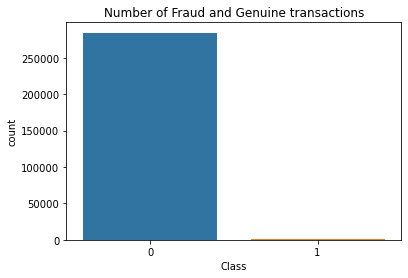

In [10]:
sns.countplot(x=df['Class']).set_title("Number of Fraud and Genuine transactions")

In [11]:
df.groupby("Class").mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


### Findings:
Look at the mean difference of both transaction. Fraud has a greater mean than legit transaction.

### Since we wish to predict fraud or not, lets split the data in dependent and independent features

In [12]:
#Independent features
X = df.drop('Class',axis=1)
#Dependent features
Y = df['Class']

### Splitting model in train and test data

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2, random_state=42)

In [15]:
#Importing a counter
from collections import Counter

In [16]:
#Without over-sampling count of y-train
print("Without over-sampling:{}".format(Counter(y_train)))

Without over-sampling:Counter({0: 227451, 1: 394})


### Over-Sampling with RandomOverSampler

In [17]:
from imblearn.over_sampling import RandomOverSampler

os = RandomOverSampler(0.75) #We've selected ratio 0.75. Y will oversample 75% to size of X
X_train_s,y_train_s = os.fit_resample(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:587: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  warnings.warn(


### Checking the new ratio of train data

In [18]:
print("Without over-sampling:{}".format(Counter(y_train)))
print("After over-sampling:{}".format(Counter(y_train_s)))

Without over-sampling:Counter({0: 227451, 1: 394})
After over-sampling:Counter({0: 227451, 1: 170588})


#### Importing other important Libraries

In [19]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score

### Model Creation- Random Forest Classifier

In [38]:
from sklearn.ensemble import RandomForestClassifier

In [39]:
rf = RandomForestClassifier(n_estimators=10,random_state=42) #We are taking 10 estimators for this Random Forest Classifier

#### Training the Random Forest Classifier with train data

In [40]:
rf.fit(X_train_s,y_train_s)

RandomForestClassifier(n_estimators=10, random_state=42)

In [41]:
y_pred = rf.predict(X_test)

Text(33.0, 0.5, 'Actual Value')

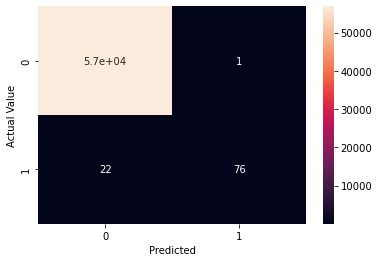

In [42]:
cf = confusion_matrix(y_test,y_pred)
sns.heatmap(cf,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual Value')

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.78      0.87        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



In [26]:
print("Accuracy score:{}%".format(accuracy_score(y_test,y_pred)*100))
print("Recall score:{}%".format(recall_score(y_test,y_pred)*100))
print("Precision score:{}%".format(precision_score(y_test,y_pred)*100))

Accuracy score:99.95962220427653%
Recall score:77.55102040816327%
Precision score:98.7012987012987%


### Model creation Logisitic Regression

#### Importing the Logistic Regressor

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

### Initializing model and getting the cross validation score

In [28]:
lr = LogisticRegression()
cvs = cross_val_score(lr,X_train_s,y_train_s,scoring="neg_mean_squared_error",cv=5)

In [29]:
cvs_mean = np.mean(cvs)
print("Cross Validation Mean Score:{}".format(cvs_mean))

Cross Validation Mean Score:-0.06053928393613488


### Findings:
The value of mean of cross validation is -0.0685058252014443

Since the scoring technique used is negative mean squared error, the closer the value to zero, the better will the model perform

The model trained is good and we can proceed with the model

### Lets fit the model to trainig data

In [30]:
lr.fit(X_train_s,y_train_s)

LogisticRegression()

### Making predictions on test data

In [31]:
y_pred = lr.predict(X_test)

#### Generating Classification Report

In [32]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.90      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.93      0.54     56962
weighted avg       1.00      0.97      0.98     56962



In [35]:
print("Accuracy score:{}%".format(accuracy_score(y_test,y_pred)*100))
print("Recall score:{}%".format(recall_score(y_test,y_pred)*100))
print("Precision score:{}%".format(precision_score(y_test,y_pred)*100))

Accuracy score:97.13668761630561%
Recall score:89.79591836734694%
Precision score:5.149210064365126%


### Conclusion
#### Accuracy score:
1. Random Forest Classifier: 99.95962220427653%
2. Logistic Regressor: Accuracy score: 97.133176503634%

Both Models perform well however the overall performance of Random Forest Classifier is better.
Thus, Random Forest Classifier model can be used for checking whether a transaction is Legit or Fraud provided the features and other information of transaction is unbias and not manipulated.